# TASK - 8: Build a model to demonstrate Multiple Linear Regression
-----------------------------------------------
    Multiple Linear Regression

In [26]:
import warnings
warnings.filterwarnings('ignore')

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#plt.style.use('ggplot')
#import seaborn as sns
%matplotlib inline

In [28]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split as tts

In [29]:
df = pd.read_csv('Datasets/Ecommerce Purchases.csv')
df.head(7)

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95
3,"7780 Julia Fords\nNew Stacy, WA 45798",36 vm,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,"Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,brent16@olson-robinson.info,Drilling engineer,30.250.74.19,es,78.04
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...",20 IE,AM,Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...,"Brown, Watson and Andrews",6011456623207998,10/25,678,Diners Club / Carte Blanche,christopherwright@gmail.com,Fine artist,24.140.33.94,es,77.82
5,"7502 Powell Mission Apt. 768\nTravisland, VA 3...",21 XT,PM,Mozilla/5.0 (Macintosh; U; PPC Mac OS X 10_8_5...,Silva-Anderson,30246185196287,07/25,7169,Discover,ynguyen@gmail.com,Fish farm manager,55.96.152.147,ru,25.15
6,"93971 Conway Causeway\nAndersonburgh, AZ 75107",96 Xt,AM,Mozilla/5.0 (compatible; MSIE 7.0; Windows NT ...,Gibson and Sons,6011398782655569,07/24,714,VISA 16 digit,olivia04@yahoo.com,Dancer,127.252.144.18,de,88.56


In [30]:
df.describe()

,Credit Card,CC Security Code,Purchase Price
count,1.000000e+04,10000.000000,10000.000000
mean,2.341374e+15,907.217800,50.347302
std,2.256103e+15,1589.693035,29.015836
min,6.040186e+10,0.000000,0.000000
25%,3.056322e+13,280.000000,25.150000
50%,8.699942e+14,548.000000,50.505000
75%,4.492298e+15,816.000000,75.770000
max,6.012000e+15,9993.000000,99.990000


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Address           10000 non-null  object 
 1   Lot               10000 non-null  object 
 2   AM or PM          10000 non-null  object 
 3   Browser Info      10000 non-null  object 
 4   Company           10000 non-null  object 
 5   Credit Card       10000 non-null  int64  
 6   CC Exp Date       10000 non-null  object 
 7   CC Security Code  10000 non-null  int64  
 8   CC Provider       10000 non-null  object 
 9   Email             10000 non-null  object 
 10  Job               10000 non-null  object 
 11  IP Address        10000 non-null  object 
 12  Language          10000 non-null  object 
 13  Purchase Price    10000 non-null  float64
dtypes: float64(1), int64(2), object(11)
memory usage: 1.1+ MB


In [32]:
df = pd.read_csv('Datasets/Ecommerce Customers.csv')
df.head(7)


,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
5,alvareznancy@lucas.biz,"645 Martha Park Apt. 611\nJeffreychester, MN 6...",FloralWhite,33.871038,12.026925,34.476878,5.493507,637.102448
6,katherine20@yahoo.com,"68388 Reyes Lights Suite 692\nJosephbury, WV 9...",DarkSlateBlue,32.021596,11.366348,36.683776,4.685017,521.572175


In [37]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\samra\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [38]:
import seaborn as sns


In [39]:
x = df["Time on Website"]
y = df["Yearly Amount Spent"]

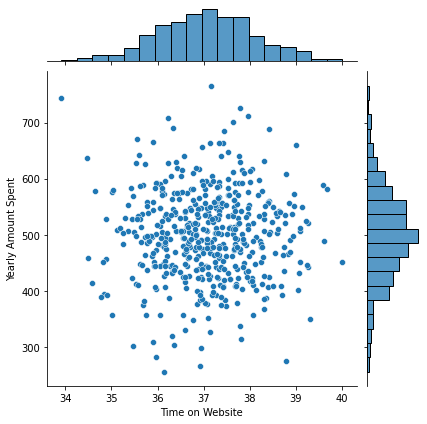

In [40]:
g = sns.jointplot(x, y)

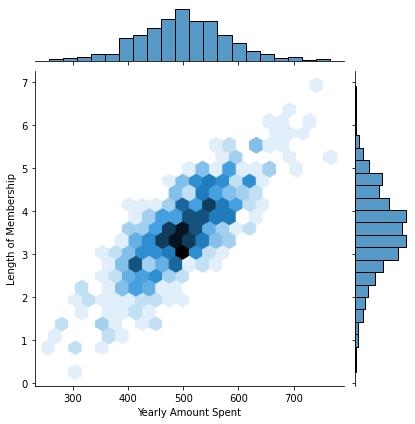

In [43]:
x = df["Yearly Amount Spent"]
y = df["Length of Membership"]
a = sns.jointplot(x,y, data=df, kind="hex")

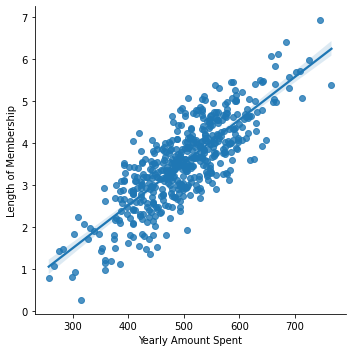

In [44]:
c = sns.lmplot("Yearly Amount Spent", "Length of Membership", data=df)

# Training and Testing Data
Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets. Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column.

In [45]:
# Multiple Features 

X = df[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']

In [46]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3, random_state=101)

# Training the Model

In [47]:
mlr = LR()
mlr.fit(X_train,y_train)

LinearRegression()

In [48]:
print('Coefficients: \n', mlr.coef_)

Coefficients: 
 [25.98154972 38.59015875  0.19040528 61.27909654]


In [49]:
predictions = mlr.predict(X_test)

In [50]:
#predictions

Text(0, 0.5, 'Predicted Y')

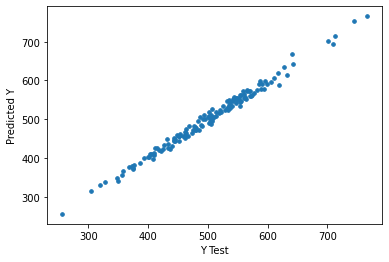

In [51]:
plt.scatter(y_test,predictions,s=13)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')


# Residuals
You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data.

Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().

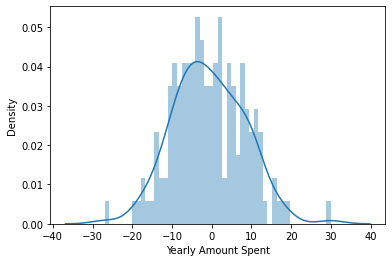

In [52]:
sns.distplot((y_test-predictions),bins=50);

# Example

In [53]:
from sklearn import datasets, metrics

In [54]:
boston = datasets.load_boston(return_X_y = False)

In [55]:
X = boston.data
y = boston.target

In [56]:
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.7, random_state = 1)


In [57]:
reg = LR()
reg.fit(X_train, y_train)

LinearRegression()

In [58]:
print('Coefficients: \n', reg.coef_)
print('Variance score: {}'.format(reg.score(X_test, y_test)))

Coefficients: 
 [-1.16358797e-01  6.44549228e-02  1.65416147e-01  1.45101654e+00
 -1.77862563e+01  2.80392779e+00  4.61905315e-02 -1.13518865e+00
  3.31725870e-01 -1.01196059e-02 -9.94812678e-01  9.18522056e-03
 -7.92395217e-01]
Variance score: 0.7094540602303252


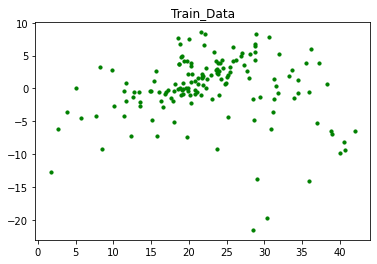

In [59]:
plt.title('Train_Data')
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train, color = "green", s = 10, label = 'Train data')
plt.show()


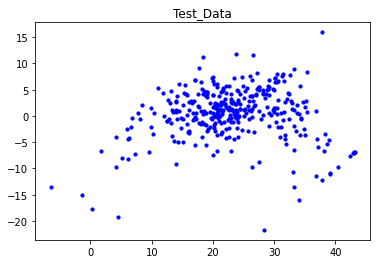

In [60]:
plt.title('Test_Data')
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test, color = "blue", s = 10, label = 'Test data')
plt.show()


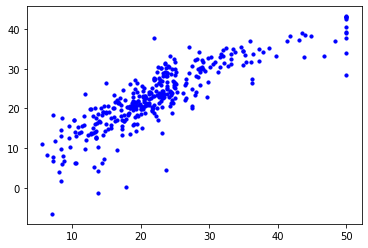

In [61]:
prediction = reg.predict(X_test)
plt.scatter(y_test, prediction, color = "blue", s = 10, label = 'Test data')
